# COGS 108 - Final Project 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [X] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Shih Wen Ma
- Andrea Diaz
- Viet Nguyen
- Manda Tran
- Matthew Luu

# Group Members IDs

- A15469802
- A15084975
- A13702483
- A14452168
- A16067866

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

- Dataset Name: Yelp Categories (categories.json)
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/all_category_list
- Number of observations: 1,563 observations

This data was used to gather all the relevant categories to collect our data using the Yelp API. We found the categories by finding all the rows who's parent category contained 'restaurant' in it.


- Dataset Name: Yelp Restaurant Data Across America
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: 150,980 observations

The data was collected by using a Yelp API and the github repo: https://github.com/gfairchild/yelpapi. We used the dataset categories.json to find all the relevant restaurant categories and ran a search query for each state. The data contains the name of the restaurant, the location (including latitude and longitude), the average rating, the applicable categories, and the number of customer reviews.


- Dataset Name: Fast Food Restaurants Across America
- Link to the dataset: https://www.kaggle.com/datafiniti/fast-food-restaurants#FastFoodRestaurants.csv
- Number of observations: 10,000 observations

This dataset provides information about 10,000 fast food restaurants across America. The data was collected from Datafiniti's Business Database in March 2018. We are using this dataset to understand which fast food chains are the most popular across the US (per state) based on the number of locations. While the data comes from a reliable source, the completion of the dataset is cannot be confirmed because there was no free option to download the data directly from the source so we had to download the data from kaggle.com. The data includes the fast food restaurant, its location, and website.

**If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.**

# Setup

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import dataframes from csv files

In [2]:
yelp_df = pd.read_csv('data/YelpRestaurants.csv')
fast_df = pd.read_csv('data/FastFoodRestaurants.csv')

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [4]:
#turns all name to lowercase so capitalization does not affect analysis
for i in yelp_df.index:
    yelp_df.at[i,'name'] = yelp_df.at[i,'name'].lower()
for j in fast_df.index:
    fast_df.at[j, 'name'] = fast_df.at[j, 'name'].lower()
    

In [5]:
#Separate longitude and latitude information from coordinates column
yelp_df['latitude'] = np.nan
yelp_df['longitude'] = np.nan
for i in yelp_df.index:
    coord = yelp_df.at[i, 'coordinates']
    yelp_df.at[i, 'latitude'] = coord[coord.find(':') + 1 : coord.find(',')]
    yelp_df.at[i, 'longitude'] = coord[coord.find(':', coord.find(',') + 1) + 1 : coord.find('}')]

yelp_df = yelp_df.drop('coordinates',axis=1)

In [6]:
#Separate address information from location column
yelp_df['address'] = ''
for i in yelp_df.index:
    address = yelp_df.at[i, 'location']
    yelp_df.at[i, 'address'] = address[address.find(':') + 3 : address.find(',') - 1]

yelp_df = yelp_df.drop('location', axis=1)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [7]:
yelp_df.head()

,Unnamed: 0,name,category,rating,review_count,state,latitude,longitude,address
0,0,el barrio,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,615,AL,33.516636,-86.802849,2211 2nd Ave N
1,1,saw's soul kitchen,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.5,782,AL,33.524190,-86.773830,215 41st St S
2,2,yo' mama's,"[{'alias': 'newamerican', 'title': 'American (...",4.5,356,AL,33.517660,-86.801830,2328 2nd Ave N
3,3,carrigan's public house,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,527,AL,33.517124,-86.798646,2430 Morris Ave
4,4,highlands bar & grill,"[{'alias': 'southern', 'title': 'Southern'}, {...",4.5,298,AL,33.500572,-86.795577,2011 11th Ave S


In [8]:
fast_df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,mcdonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,frisch's big boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,mcdonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,omg! rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [9]:
# there are ~150k restaurants in our general df
yelp_df.shape

(150980, 9)

In [10]:
# there are ~10k fast food restaurants in our fast food df
fast_df.shape 

(10000, 10)

In [11]:
# Our general df includes 48 states, and is missing AR and DE
yelp_df["state"].unique() 

array(['AL', 'AK', 'AZ', 'OK', 'CA', 'CO', 'CT', 'DC', 'KS', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KY', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
       'WA', 'WV', 'WI', 'WY'], dtype=object)

In [12]:
# our fastfood df includes 50 states, plus DC and Co Spgs
fast_df["province"].unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'OK', 'IN', 'NC', 'TN', 'TX', 'LA',
       'KS', 'ND', 'UT', 'GA', 'NM', 'OR', 'HI', 'VT', 'MI', 'MO', 'WI',
       'WA', 'MS', 'NE', 'ME', 'MN', 'AL', 'IA', 'WV', 'AZ', 'SD', 'WY',
       'IL', 'VA', 'FL', 'CA', 'MT', 'ID', 'PA', 'RI', 'NV', 'NJ', 'MA',
       'MD', 'CO', 'NH', 'CT', 'AK', 'DE', 'DC', 'Co Spgs'], dtype=object)

In [13]:
# our general df has no null values!
null_rows = yelp_df.isnull().any(axis=1)
yelp_df[null_rows].shape

(0, 9)

In [14]:
# our fast food df has 465 rows with null values
null_rows = fast_df.isnull().any(axis=1)
fast_df[null_rows].shape

(465, 10)

In [15]:
# check if we can drop the null rows
fast_df["province"].value_counts()

CA         676
TX         634
OH         543
FL         471
IN         379
IL         363
NC         358
GA         347
MO         334
KY         332
VA         327
PA         283
NY         269
MI         251
TN         245
SC         238
LA         237
AL         236
WA         209
OK         208
AZ         208
WI         186
IA         166
UT         159
MD         159
CO         158
AR         151
NJ         151
NM         149
MN         148
NV         135
MA         131
OR         114
SD         105
KS         103
ID          99
CT          96
WV          93
NE          92
MS          82
ND          50
ME          44
VT          43
WY          41
HI          40
NH          36
DE          32
MT          25
RI          24
DC          21
AK          14
Co Spgs      5
Name: province, dtype: int64

In [16]:
fast_df[null_rows]["province"].value_counts()

CA    58
TX    31
IL    26
FL    26
GA    21
NY    19
OH    18
TN    18
PA    16
NJ    15
NC    14
MO    13
SC    12
KY    12
WA    11
AZ    10
MD    10
IN    10
AL    10
NV    10
MI    10
VA     9
CO     9
LA     8
OK     7
AR     6
OR     5
WI     5
UT     5
CT     4
KS     4
IA     4
NE     3
NM     3
HI     3
DE     2
WV     2
MN     2
SD     2
DC     2
NH     2
MS     2
MA     2
AK     1
ID     1
RI     1
VT     1
Name: province, dtype: int64

In [18]:
fast_df["name"].value_counts()

mcdonald's                     1971
burger king                    1154
taco bell                       873
wendy's                         731
arby's                          518
                               ... 
long john silver's / a&w          1
nick's burgers                    1
kim lee fast food                 1
mazatlan mexican restaurant       1
red robin gourmet burgers         1
Name: name, Length: 524, dtype: int64

In [19]:
fast_df[null_rows]["name"].value_counts()

mcdonald's                   43
burger king                  35
kfc                          25
subway                       20
taco bell                    18
                             ..
crystal restaurant            1
taco delight                  1
carl's jr / green burrito     1
jersey jacks eatery           1
baskin-robbins                1
Name: name, Length: 197, dtype: int64

In [20]:
# when compared to the original dataset, the null rows have similar ratios of province/name value counts
# therefore we can safely drop rows with missing data 
fast_df=fast_df.dropna()
fast_df.shape

(9535, 10)

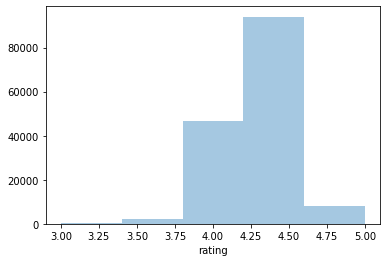

In [21]:
# Let's start by plotting histograms of general food rating and fast food rating
sns.distplot(yelp_df['rating'], kde=False, bins=5);

f1 = plt.gcf()

In [22]:
# There are 5 possible ratings in our data set: 3, 3.5, 4, 4.5, and 5
yelp_df["rating"].unique()

array([4.5, 4. , 5. , 3.5, 3. ])

In [23]:
# It appears that our rating data is normal-ish and is skewed right. We have a mean of 4.358 and an std of .294.
yelp_df["rating"].describe()

count    150980.000000
mean          4.358157
std           0.294299
min           3.000000
25%           4.000000
50%           4.500000
75%           4.500000
max           5.000000
Name: rating, dtype: float64

Note that the fast food dataset doesn't have a rating column. We will need to merge the two datasets ...

In [24]:
# To get the ratings of the data found in the fast food dataset, we merge the yelp dataset (which has the ratings) with the fast food dataset 
merged_df = fast_df
merged_df['ratings'] = np.nan
for i in fast_df.index:
    for j in yelp_df.index:
        if merged_df.at[i, 'name'] == yelp_df.at[j, 'name']:
            if merged_df.at[i, 'address'] == yelp_df.at[j, 'address']:
                merged_df.iloc[i].ratings = yelp_df.iloc[j].rating

merged_df.dropna()

print(merged_df)

KeyboardInterrupt: 

In [43]:
rounded_yelp_df = yelp_df.round(5)

merged_df = pd.merge(fast_df, rounded_yelp_df, how='left', on=['latitude','longitude'])
print(merged_df.shape)
merged_df['ratings'].isnull().count()

(9636, 18)


9636

In [ ]:
#TODO: Explain what the merged df shows/means

In [ ]:
# TODO: describe the lattitude/longitude data to see if there is any bias in geography for our 2 datasets

In [ ]:
# TODO: maybe move the null row removal into the data cleanup section rather than analysis

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*